<a href="https://colab.research.google.com/github/mikislin/summer20-Intro-python/blob/master/05_Numpy_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Descriptive Statistics with Numpy**

NumPy has a numpy.histogram() function that is a graphical representation of the frequency distribution of data. Rectangles of equal horizontal size corresponding to class interval called bin and variable height corresponding to frequency.

In [ ]:
import numpy as np 
   
a = np.random.normal(50, 25, 1000) 
bins_for_a = np.arange(0,101, 20)
hist,bins = np.histogram(a,bins = bins_for_a) 
print(hist)
print(bins)

[ 89 217 307 249  85]
[  0  20  40  60  80 100]


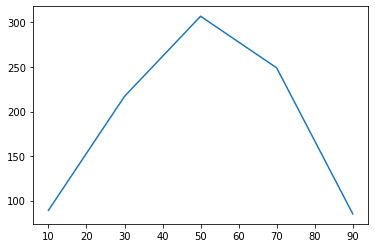

In [ ]:
from matplotlib import pyplot as plt
bin_centers = bins[:-1] + np.diff(bins)/2 
plt.plot(bin_centers,hist)
plt.show()

In [ ]:
np.diff(bins,axis=0)

array([20, 20, 20, 20, 20])

##**Resampling methods**

In [ ]:
# Set the random seed to make the random numbers predictable
# good for reproducibility

np.random.seed(123)

In [ ]:
# create 
x = np.random.randint(0, 10, (8, 12))
x

In [ ]:
# Shuffling occurs "in place" for efficiency
np.random.shuffle(x)
x

In [ ]:
# numpy.random.permutation does the same thing but returns a copy
np.random.permutation(x)

In [ ]:
# When given an integre n, permutation treats is as the array arange(n)
np.random.permutation(10)

##**Bootstrap**

The bootstrap is commonly used to estimate statistics when theory fails.

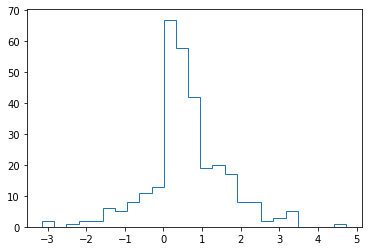

In [ ]:
# what is the 95% confidence interval for
# the mean of this data set if you didn't know how it was generated?

x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');


In [ ]:
n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [2.5, 97.5])

array([0.47710311, 0.70823619])

In [ ]:
# let's define data with a function
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [ ]:
# let's get n data samples 
n = 100
x = f(np.random.random(n))
x_norm = np.random.normal(1.5, 0.2, n)

In [ ]:
# bootstrap 
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
yb =  np.cumsum(xb, axis=0)
yb_x =  np.cumsum(x, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

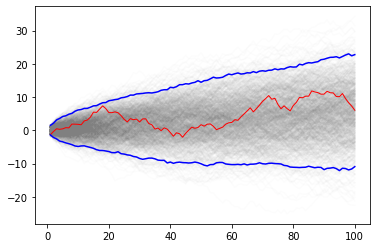

In [ ]:
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb_x, c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')
plt.show()

##**Permutation resampling**

Permuatation resampling is used ot generate the null distribtuion of labeled data by switching lebals.

Suppose you have 2 data sets from unknown distribution and you want to test if some arbitrary statistic (e.g 7th percentile) is the same in the 2 data sets - what can you do?

An appropirate test statistic is the difference between the 7th percentile, and if we knew the null distribution of this statisic, we could test for the null hypothesis that the statistic = 0. Permuting the labels of the 2 data sets allows us to create the empirical null distribution.

In [ ]:
x = np.concatenate([np.random.exponential(size=200),
                    np.random.normal(0, 1, size=100)])
y = np.concatenate([np.random.exponential(size=250),
                    np.random.normal(0, 1, size=50)])

In [ ]:
# map to minimal len data
n1, n2 = map(len, (x, y))

In [ ]:
data = np.concatenate([x, y])
reps = 10000
ps = np.array([np.random.permutation(n1+n2) for i in range(reps)])
ps.shape

(10000, 600)

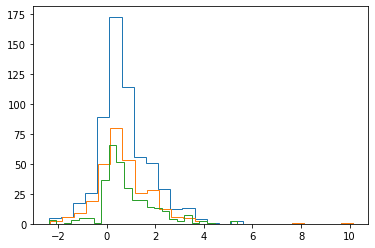

In [ ]:
plt.hist(data, 25, histtype='step')
plt.hist(x, 25, histtype='step')
plt.hist(y, 25, histtype='step')
plt.show()

In [ ]:
xp = data[ps[:, :n1]]
yp = data[ps[:, n1:]]
samples = np.percentile(xp, 7, axis=1) - np.percentile(yp, 7, axis=1)

p-value = 0.009


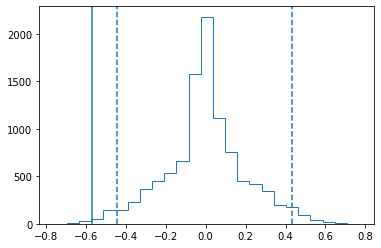

In [ ]:
plt.hist(samples, 25, histtype='step')
test_stat = np.percentile(x, 7) - np.percentile(y, 7)
plt.axvline(test_stat)
plt.axvline(np.percentile(samples, 2.5), linestyle='--')
plt.axvline(np.percentile(samples, 97.5), linestyle='--')
print("p-value =", 2*np.sum(samples >= np.abs(test_stat))/reps)